# Adding all relevant imports and tables


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "https://drive.google.com/file/d/1afxwDXfl-7cQ_qLwyDitfcCx3u7WMvkU/view?usp=drive_link" # products.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products = pd.read_csv(path)

url = "https://drive.google.com/file/d/1FYhN_2AzTBFuWcfHaRuKcuCE6CWXsWtG/view?usp=sharing" # orderlines.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines = pd.read_csv(path)

url = "https://drive.google.com/file/d/1Vu0q91qZw6lqhIqbjoXYvYAQTmVHh6uZ/view?usp=drive_link" # products.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders = pd.read_csv(path)

url = "https://drive.google.com/file/d/1m1ThDDIYRTTii-rqM5SEQjJ8McidJskD/view?usp=drive_link" # brands.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)


# Changing date types to Datetime

In [3]:
orders.created_date = pd.to_datetime(orders['created_date'])
orderlines.date = pd.to_datetime(orderlines['date'])

# Cleaning Products Table



Deleting of duplicate rows & missing values in 'price'

In [4]:
products.info()                # Check: how many rows in the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [5]:
products_cl = products.copy()
products_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [6]:
products_cl.duplicated().sum()          # Check: how many duplicated rows in the table


8746

In [7]:
products_cl.drop_duplicates(inplace = True)           # Drop duplicated rows
products_cl.duplicated().sum()                        # Check: how many duplicated rows

0

In [8]:
products_cl.info()                  # Check: how many rows in the table?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10580 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          10580 non-null  object
 1   name         10580 non-null  object
 2   desc         10573 non-null  object
 3   price        10534 non-null  object
 4   promo_price  10580 non-null  object
 5   in_stock     10580 non-null  int64 
 6   type         10530 non-null  object
dtypes: int64(1), object(6)
memory usage: 661.2+ KB


In [9]:
products_cl.price.isna().value_counts(normalize=True)*100          # Check: percentage of missing values in 'price'

False    99.565217
True      0.434783
Name: price, dtype: float64

In [10]:
products_cl = products_cl.loc[~products_cl.price.isna(), :]               # Delete rows with missing values in price
products_cl.info()                                                        # Check: how many rows in the table?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10534 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          10534 non-null  object
 1   name         10534 non-null  object
 2   desc         10527 non-null  object
 3   price        10534 non-null  object
 4   promo_price  10534 non-null  object
 5   in_stock     10534 non-null  int64 
 6   type         10484 non-null  object
dtypes: int64(1), object(6)
memory usage: 658.4+ KB


Issues with 'price'

In [11]:
problems_number_products = products_cl.loc[(products_cl.price.str.contains("\d+\.\d+\.\d+")) | (products_cl.price.str.contains("\d+\.\d{3,}")), :].shape[0]           # Check: how many cells contain prices with two dots & 3 decimals
problems_number_products

542

In [12]:
products_cl = products_cl.loc[(~products_cl.price.astype(str).str.contains("\d+\.\d+\.\d+")) & (~products_cl.price.astype(str).str.contains("\d+\.\d{3,}")),:]          # Delete cels with two dots & three decimals
products_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9992 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          9992 non-null   object
 1   name         9992 non-null   object
 2   desc         9986 non-null   object
 3   price        9992 non-null   object
 4   promo_price  9992 non-null   object
 5   in_stock     9992 non-null   int64 
 6   type         9946 non-null   object
dtypes: int64(1), object(6)
memory usage: 624.5+ KB


In [13]:
products_cl.price = pd.to_numeric(products_cl.price)                # Convert price to float
products_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9992 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          9992 non-null   object 
 1   name         9992 non-null   object 
 2   desc         9986 non-null   object 
 3   price        9992 non-null   float64
 4   promo_price  9992 non-null   object 
 5   in_stock     9992 non-null   int64  
 6   type         9946 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 624.5+ KB


<ipython-input-13-fc5825cbe5a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_cl.price = pd.to_numeric(products_cl.price)                # Convert price to float


In [14]:
print(len(products_cl))
print(products_cl['sku'].str.len())


9992
0        7
1        7
2        7
3        7
4        7
        ..
19321    7
19322    7
19323    7
19324    7
19325    7
Name: sku, Length: 9992, dtype: int64


In [15]:
products_cl["short_brand"] = products_cl["sku"].str[:3]
products_cl

,sku,name,desc,price,promo_price,in_stock,type,short_brand
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,RAI
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,589.996,0,13855401,APP
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,569.898,0,1387,APP
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,229.997,0,1230,APP
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364,KIN
...,...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,1,12282,BEL
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392,THU
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392,THU
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,0,1392,THU


# Cleaning Orderlines table

In [16]:
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  int64         
 1   id_order          293983 non-null  int64         
 2   product_id        293983 non-null  int64         
 3   product_quantity  293983 non-null  int64         
 4   sku               293983 non-null  object        
 5   unit_price        293983 non-null  object        
 6   date              293983 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 15.7+ MB


In [17]:
orderlines_cl = orderlines.copy()
orderlines_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  int64         
 1   id_order          293983 non-null  int64         
 2   product_id        293983 non-null  int64         
 3   product_quantity  293983 non-null  int64         
 4   sku               293983 non-null  object        
 5   unit_price        293983 non-null  object        
 6   date              293983 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 15.7+ MB


In [18]:
two_dot_order_ids_list = orderlines_cl.loc[orderlines_cl.unit_price.str.contains("\d+\.\d+\.\d+"), "id_order"]                        # Delete unit_price with two dots
orderlines_cl = orderlines_cl.loc[~orderlines_cl.id_order.isin(two_dot_order_ids_list)]

orderlines_cl.unit_price = pd.to_numeric(orderlines_cl.unit_price)                                                                              # Convert unit price to float
orderlines_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216250 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                216250 non-null  int64         
 1   id_order          216250 non-null  int64         
 2   product_id        216250 non-null  int64         
 3   product_quantity  216250 non-null  int64         
 4   sku               216250 non-null  object        
 5   unit_price        216250 non-null  float64       
 6   date              216250 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 13.2+ MB


In [19]:
# orderlines_cl = orderlines_cl.rename(columns={'id_order': 'order_id'})

# Cleaning Orders table

In [20]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      226909 non-null  int64         
 1   created_date  226909 non-null  datetime64[ns]
 2   total_paid    226904 non-null  float64       
 3   state         226909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.9+ MB


In [21]:
orders_cl = orders.copy()
orders_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      226909 non-null  int64         
 1   created_date  226909 non-null  datetime64[ns]
 2   total_paid    226904 non-null  float64       
 3   state         226909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.9+ MB


In [22]:
orders_cl = orders_cl.loc[~orders_cl.total_paid.isna(), :]                  # Delete rows with NaNs in total_paid
orders_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226904 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      226904 non-null  int64         
 1   created_date  226904 non-null  datetime64[ns]
 2   total_paid    226904 non-null  float64       
 3   state         226904 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 8.7+ MB


In [23]:
orders_cl.nunique()

order_id        226904
created_date    224823
total_paid       31236
state                5
dtype: int64

In [24]:
orders_cl.state.value_counts()

Shopping Basket    117809
Completed           46605
Place Order         40883
Pending             14374
Cancelled            7233
Name: state, dtype: int64

In [25]:
orders_cl = orders_cl.loc[~((orders_cl.state == 'Shopping Basket') | (orders_cl.state == 'Cancelled') | (orders_cl.state == 'Pending') | (orders_cl.state == 'Place Order'))]
orders_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46605 entries, 1 to 226619
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      46605 non-null  int64         
 1   created_date  46605 non-null  datetime64[ns]
 2   total_paid    46605 non-null  float64       
 3   state         46605 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.8+ MB


# Cleaning Brands table

In [26]:
brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


In [27]:
brands_cl = brands.copy()
brands_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


# Data Quality

In [28]:
# Define Pandas display format
pd.set_option("display.float_format", lambda x: "%.2f" % x)
pd.set_option("display.max_rows", 1000)

In [29]:
# Exclude unwanted orders (only completed orders)
actual_purchases_df = orders_cl.copy()
actual_purchases_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46605 entries, 1 to 226619
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      46605 non-null  int64         
 1   created_date  46605 non-null  datetime64[ns]
 2   total_paid    46605 non-null  float64       
 3   state         46605 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.8+ MB


In [30]:
# List of order_ids that are Completed
actual_purchases_list = list(actual_purchases_df["order_id"].unique())


In [31]:
# Delete id_orders in orderlines_cl which are not in Completed orders
orderlines_cl.loc[~ orderlines_cl.id_order.isin(actual_purchases_list)]
orders_qu = orders_cl.loc[orders_cl["order_id"].isin(actual_purchases_df["order_id"]), :].copy()

In [32]:
# Delete orders_id in orders_cl which are not in Completed orders
orderlines_qu = orderlines_cl.loc[orderlines_cl["id_order"].isin(actual_purchases_list), :].copy()

In [33]:
len(orders_qu.order_id.unique())

46605

In [34]:
len(orderlines_qu.id_order.unique())
# --> in orders_qu are more unique order_ids than id_orders in irderlines_qu --> delete them!

43064

In [35]:
#How many order_ids are in orders_qu, that are not in the orderlines_qu
orders_qu.loc[~orders_qu.order_id.isin(orderlines_qu.id_order.unique())]

,order_id,created_date,total_paid,state
8,245941,2017-01-01 10:32:23,183.52,Completed
31,257847,2017-11-23 23:46:54,1367.11,Completed
35,258985,2017-07-31 12:52:38,2264.60,Completed
40,259668,2017-10-06 22:06:58,1132.33,Completed
46,262016,2017-08-18 01:05:38,3109.57,Completed
...,...,...,...,...
225865,526357,2018-03-13 12:01:26,1405.99,Completed
225887,526380,2018-03-13 12:16:06,1436.99,Completed
226012,526505,2018-03-13 15:56:14,1421.99,Completed
226014,526507,2018-03-13 16:04:20,1137.97,Completed


In [36]:
#How many id_orders are in orderlines_qu, that are not in the orders_qu
orderlines_qu.loc[~orderlines_qu.id_order.isin(orders_qu.order_id.unique())]

,id,id_order,product_id,product_quantity,sku,unit_price,date


In [37]:
# Merge orders_qu & orderlines_qu to get the order_ids that are in both dfs
orders_lines_merged_df = orders_qu.merge(orderlines_qu, how="inner", left_on="order_id", right_on="id_order")
orders_lines_merged_df.head(5)
orders_lines_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56714 entries, 0 to 56713
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          56714 non-null  int64         
 1   created_date      56714 non-null  datetime64[ns]
 2   total_paid        56714 non-null  float64       
 3   state             56714 non-null  object        
 4   id                56714 non-null  int64         
 5   id_order          56714 non-null  int64         
 6   product_id        56714 non-null  int64         
 7   product_quantity  56714 non-null  int64         
 8   sku               56714 non-null  object        
 9   unit_price        56714 non-null  float64       
 10  date              56714 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(5), object(2)
memory usage: 5.2+ MB


In [38]:
# List theese ids
o_ids_in_both_list = list(orders_lines_merged_df["order_id"].unique())

In [39]:
# Delete them
orders_qu = orders_qu.loc[orders_qu["order_id"].isin(o_ids_in_both_list), :]
orderlines_qu = orderlines_qu.loc[orderlines_cl["id_order"].isin(o_ids_in_both_list), :]

In [40]:
#Check
len(orders_qu["order_id"].unique()), len(orderlines_qu["id_order"].unique())

(43064, 43064)

In [41]:
# Exclude orders with unknown products
products_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9992 entries, 0 to 19325
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          9992 non-null   object 
 1   name         9992 non-null   object 
 2   desc         9986 non-null   object 
 3   price        9992 non-null   float64
 4   promo_price  9992 non-null   object 
 5   in_stock     9992 non-null   int64  
 6   type         9946 non-null   object 
 7   short_brand  9992 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 702.6+ KB


In [42]:
#How many skus are in orderlines_qu that are not in products_qu
skus_to_remove = orderlines_qu[~orderlines_qu['sku'].isin(products_cl['sku'])]['sku'].unique().tolist()

In [43]:
# Delete them in orders_qu
orders_qu = orders_qu[~orders_qu['order_id'].isin(orderlines_qu[orderlines_qu['sku'].isin(skus_to_remove)]['id_order'])]
orders_qu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41701 entries, 1 to 226619
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      41701 non-null  int64         
 1   created_date  41701 non-null  datetime64[ns]
 2   total_paid    41701 non-null  float64       
 3   state         41701 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [44]:
# Delete them in orderlines_qu
orderlines_qu = orderlines_qu[~orderlines_qu['id_order'].isin(orderlines_qu[orderlines_qu['sku'].isin(skus_to_remove)]['id_order'])]
orderlines_qu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54324 entries, 7 to 293661
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                54324 non-null  int64         
 1   id_order          54324 non-null  int64         
 2   product_id        54324 non-null  int64         
 3   product_quantity  54324 non-null  int64         
 4   sku               54324 non-null  object        
 5   unit_price        54324 non-null  float64       
 6   date              54324 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 3.3+ MB


In [45]:
len(orders_qu["order_id"].unique()), len(orderlines_qu["id_order"].unique())

(41701, 41701)

# How many orders are there?
# How many products are there?
# What is the time period?

In [46]:
orders_qu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41701 entries, 1 to 226619
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      41701 non-null  int64         
 1   created_date  41701 non-null  datetime64[ns]
 2   total_paid    41701 non-null  float64       
 3   state         41701 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [47]:
orderlines_qu[["sku"]].nunique()

sku    5140
dtype: int64

In [48]:
orders_qu["created_date"].min(), orders_qu["created_date"].max()

(Timestamp('2017-01-01 01:51:47'), Timestamp('2018-03-14 12:03:52'))

# Revenues + deleting outliers

In [49]:
orderlines_qu_copy = orderlines_qu.copy()

In [50]:
# Adding colum unit_price_total
orderlines_qu_copy["unit_price_total"] = orderlines_qu_copy["product_quantity"] * orderlines_qu_copy["unit_price"]
orderlines_qu_copy

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total
7,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49
8,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99
9,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19
18,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90
24,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,142.49
...,...,...,...,...,...,...,...,...
293599,1649474,525664,0,1,TUC0207,16.52,2018-03-14 11:45:05,16.52
293616,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,19.98
293621,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,19.98
293644,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,29.97


In [51]:
# Group by order_ids
orderlines_qu_group_order_df = orderlines_qu_copy.groupby("id_order", as_index=False)["unit_price_total"].sum()
orderlines_qu_group_order_df

,id_order,unit_price_total
0,241423,129.16
1,242832,10.77
2,243330,77.99
3,245275,149.00
4,245595,105.98
...,...,...
41696,527042,13.99
41697,527070,19.98
41698,527074,19.98
41699,527096,29.97


In [52]:
#Avergae difference between total_paid and unit_price_total
orders_qu_copy = orders_qu.copy()

In [53]:
diff_df = orders_qu_copy.merge(orderlines_qu_group_order_df,
                               how = 'inner',
                               left_on="order_id",
                               right_on="id_order"
                               )

diff_df

,order_id,created_date,total_paid,state,id_order,unit_price_total
0,241423,2017-11-06 13:10:02,136.15,Completed,241423,129.16
1,242832,2017-12-31 17:40:03,15.76,Completed,242832,10.77
2,243330,2017-02-16 10:59:38,84.98,Completed,243330,77.99
3,245275,2017-06-28 11:35:37,149.00,Completed,245275,149.00
4,245595,2017-01-21 12:52:47,112.97,Completed,245595,105.98
...,...,...,...,...,...,...
41696,527042,2018-03-14 11:47:50,18.98,Completed,527042,13.99
41697,527070,2018-03-14 11:50:48,24.97,Completed,527070,19.98
41698,527074,2018-03-14 11:51:42,24.97,Completed,527074,19.98
41699,527096,2018-03-14 11:58:40,34.96,Completed,527096,29.97


In [54]:
# Add column with difference
diff_df["difference"] = diff_df["total_paid"] - diff_df["unit_price_total"]
diff_df.head()

,order_id,created_date,total_paid,state,id_order,unit_price_total,difference
0,241423,2017-11-06 13:10:02,136.15,Completed,241423,129.16,6.99
1,242832,2017-12-31 17:40:03,15.76,Completed,242832,10.77,4.99
2,243330,2017-02-16 10:59:38,84.98,Completed,243330,77.99,6.99
3,245275,2017-06-28 11:35:37,149.00,Completed,245275,149.00,0.00
4,245595,2017-01-21 12:52:47,112.97,Completed,245595,105.98,6.99


In [55]:
# Avg. difference
diff_df.difference.mean().round(2)

4.47

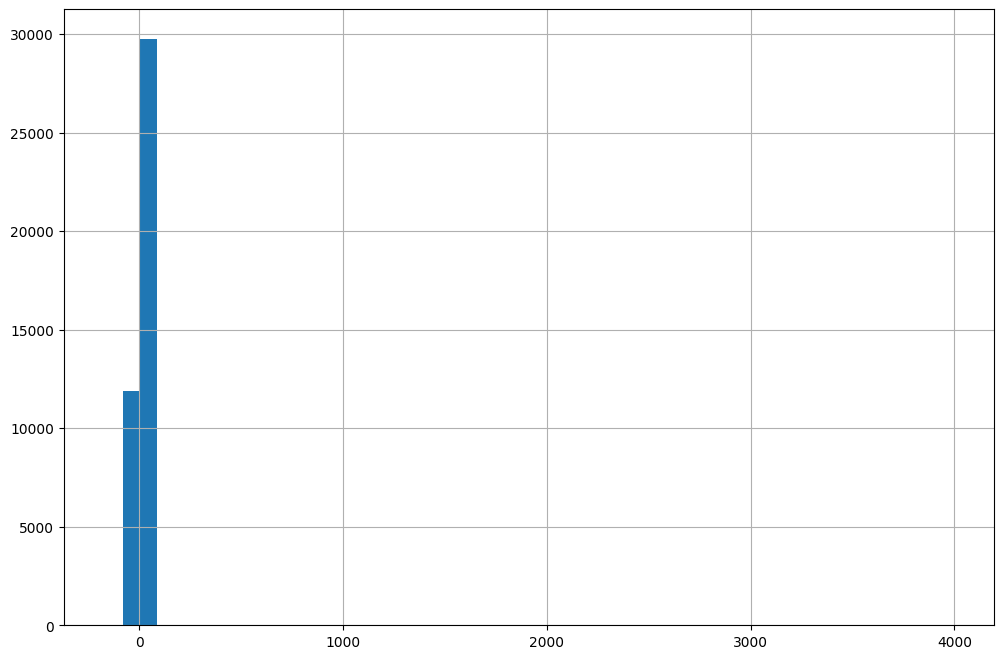

In [56]:
# Distribution of these differences
diff_df.difference.hist(bins= 50, figsize=(12,8));

In [57]:
# Looking at outliers etc.
diff_df.difference.describe()

count   41701.00
mean        4.47
std        26.05
min      -165.00
25%         0.00
50%         4.99
75%         6.99
max      3984.99
Name: difference, dtype: float64

In [58]:
# Delete outliers
# calculate the quartiles
Q1 = diff_df["difference"].quantile(0.25)
Q3 = diff_df["difference"].quantile(0.75)

# calculate the interquartile range
IQR = Q3-Q1

# filter the DataFrame to include only "non-outliers"
diff_no_outliers_df = diff_df.loc[(diff_df["difference"] >= (Q1 - 1.5*IQR)) & (diff_df["difference"] <= (Q3 + 1.5*IQR))]
diff_no_outliers_df

,order_id,created_date,total_paid,state,id_order,unit_price_total,difference
0,241423,2017-11-06 13:10:02,136.15,Completed,241423,129.16,6.99
1,242832,2017-12-31 17:40:03,15.76,Completed,242832,10.77,4.99
2,243330,2017-02-16 10:59:38,84.98,Completed,243330,77.99,6.99
3,245275,2017-06-28 11:35:37,149.00,Completed,245275,149.00,0.00
4,245595,2017-01-21 12:52:47,112.97,Completed,245595,105.98,6.99
...,...,...,...,...,...,...,...
41696,527042,2018-03-14 11:47:50,18.98,Completed,527042,13.99,4.99
41697,527070,2018-03-14 11:50:48,24.97,Completed,527070,19.98,4.99
41698,527074,2018-03-14 11:51:42,24.97,Completed,527074,19.98,4.99
41699,527096,2018-03-14 11:58:40,34.96,Completed,527096,29.97,4.99


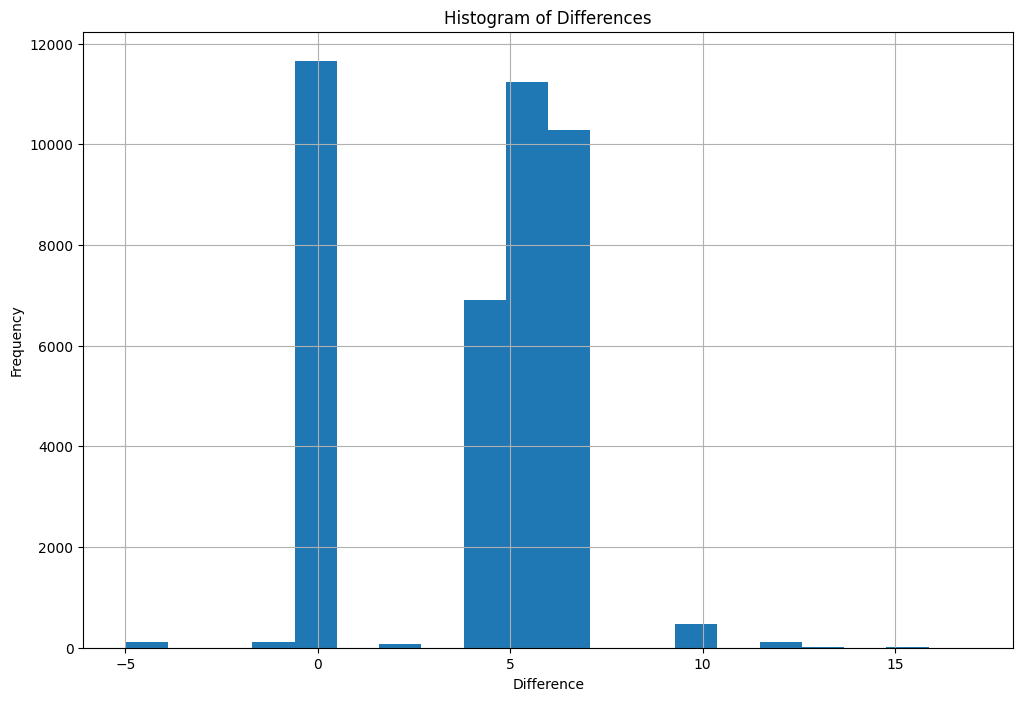

In [59]:
import matplotlib.pyplot as plt

# Plot the histogram
ax = diff_no_outliers_df.difference.hist(bins=20, figsize=(12, 8))

# Add a title to the plot
ax.set_title("Histogram of Differences")

# Add labels to the x-axis and y-axis
ax.set_xlabel("Difference")
ax.set_ylabel("Frequency")

# Display the plot
plt.show()


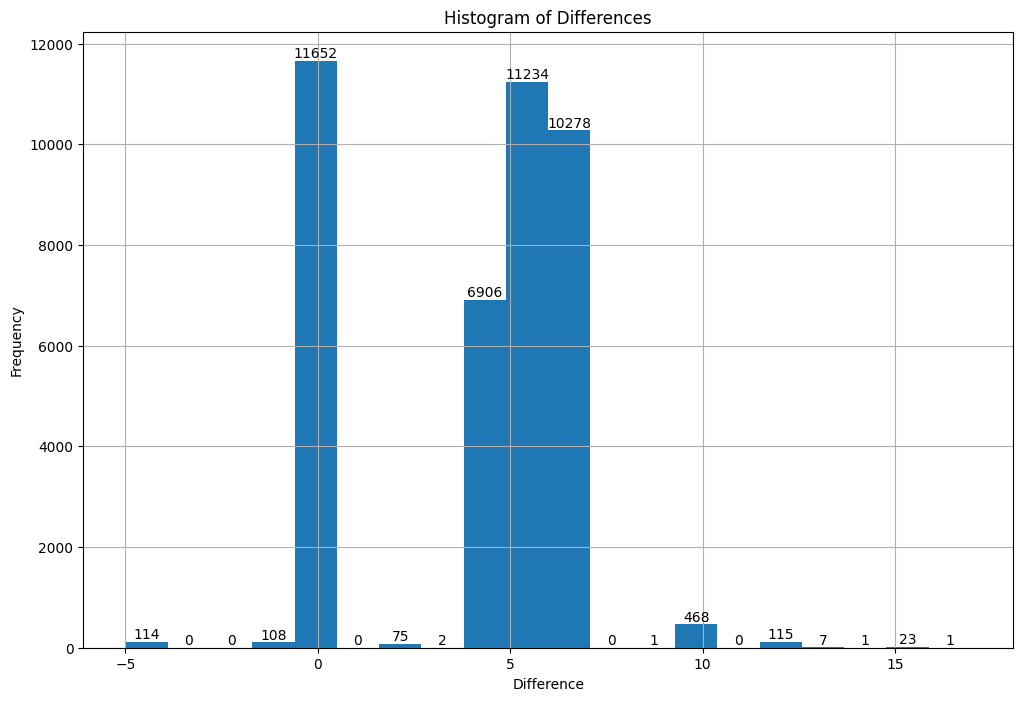

In [60]:
import matplotlib.pyplot as plt

# Create the histogram plot
ax = diff_no_outliers_df.difference.hist(bins=20, figsize=(12, 8))

# Set the x-axis label
ax.set_xlabel("Difference")

# Set the y-axis label
ax.set_ylabel("Frequency")

# Add a title to the plot
plt.title("Histogram of Differences")

# Iterate over each bar in the histogram
for rect in ax.patches:
    height = rect.get_height()
    x = rect.get_x() + rect.get_width() / 2
    y = height + 5
    plt.text(x, y, f"{int(height)}", ha='center', va='bottom')

# Show the plot
plt.show()


In [61]:
# Delete outliers from orders_qu and orderlines_qu
normal_diff_list = list(diff_no_outliers_df["order_id"].unique())

orders_qu = orders_qu.loc[orders_qu["order_id"].isin(normal_diff_list), :]
orderlines_qu = orderlines_qu.loc[orderlines_cl["id_order"].isin(normal_diff_list), :]

In [62]:
len(orders_qu["order_id"].unique()), len(orderlines_qu["id_order"].unique())

(40985, 40985)

# How should products be classified into different categories to simplify reports and analysis?

In [63]:
# per brand?

# What is the distribution of product prices across different categories?

# What are the most sold products?

In [64]:
orderlines_qu.groupby("sku")[["product_quantity"]].sum().sort_values(by="product_quantity", ascending=False).head(10)

,product_quantity
sku,
APP1190,955
APP0698,820
APP1922,537
APP0927,489
WDT0183,476
SAM0074,329
CRU0051,328
APP2446,270
NTE0013,252


# What are the products that generate the most revenue?

In [65]:
orderlines_qu_copy.groupby("sku")[["unit_price_total"]].sum().sort_values(by="unit_price_total", ascending=False).head(10)

,unit_price_total
sku,
LGE0044,136270.35
APP2446,104560.64
APP1922,89419.24
APP2477,86624.52
APP1970,81608.03
APP2072,75764.89
APP2485,73678.87
WDT0183,66040.91
APP2483,60824.79


# How big are the offered discounts as a percentage of the product prices

In [66]:
orderlines_qu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53231 entries, 7 to 293661
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                53231 non-null  int64         
 1   id_order          53231 non-null  int64         
 2   product_id        53231 non-null  int64         
 3   product_quantity  53231 non-null  int64         
 4   sku               53231 non-null  object        
 5   unit_price        53231 non-null  float64       
 6   date              53231 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 3.2+ MB


In [67]:
# Merge orderlines_qu and products_cl
ol_p= orderlines_qu.merge(
    products_cl,
    on="sku",
    how="inner"
)
ol_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53231 entries, 0 to 53230
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                53231 non-null  int64         
 1   id_order          53231 non-null  int64         
 2   product_id        53231 non-null  int64         
 3   product_quantity  53231 non-null  int64         
 4   sku               53231 non-null  object        
 5   unit_price        53231 non-null  float64       
 6   date              53231 non-null  datetime64[ns]
 7   name              53231 non-null  object        
 8   desc              53228 non-null  object        
 9   price             53231 non-null  float64       
 10  promo_price       53231 non-null  object        
 11  in_stock          53231 non-null  int64         
 12  type              53220 non-null  object        
 13  short_brand       53231 non-null  object        
dtypes: datetime64[ns](1), 

In [68]:
# Add a column Discount
ol_p["Discount"] = (ol_p["price"] - ol_p["unit_price"]).round()
ol_p.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type,short_brand,Discount
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,14.00
1,1120182,299404,0,1,OWC0100,47.49,2017-01-01 22:50:39,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,14.00
2,1121550,300650,0,1,OWC0100,49.99,2017-01-02 15:31:09,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,11.00
3,1121801,300760,0,1,OWC0100,49.99,2017-01-02 17:20:31,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,11.00
4,1124334,301975,0,1,OWC0100,49.99,2017-01-03 20:04:54,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,11.00


In [69]:
# Add a column Discount_%
ol_p["Discount_%"] = (ol_p["Discount"] * 100 / ol_p["price"]).round()
ol_p.head(30)

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type,short_brand,Discount,Discount_%
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,14.00,23.00
1,1120182,299404,0,1,OWC0100,47.49,2017-01-01 22:50:39,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,14.00,23.00
2,1121550,300650,0,1,OWC0100,49.99,2017-01-02 15:31:09,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,11.00,18.00
3,1121801,300760,0,1,OWC0100,49.99,2017-01-02 17:20:31,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,11.00,18.00
4,1124334,301975,0,1,OWC0100,49.99,2017-01-03 20:04:54,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,11.00,18.00
5,1129468,302293,0,5,OWC0100,49.99,2017-01-04 09:32:44,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,11.00,18.00
6,1132204,303599,0,1,OWC0100,49.99,2017-01-06 13:20:43,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,11.00,18.00
7,1134856,296253,0,1,OWC0100,49.99,2017-01-08 12:11:12,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,11.00,18.00
8,1137101,305687,0,1,OWC0100,49.99,2017-01-09 13:18:35,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,11.00,18.00
9,1142486,307908,0,1,OWC0100,49.99,2017-01-12 12:23:49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,11.00,18.00


In [70]:
# Which products have the biggest discount_%?
ol_p.groupby(["sku", "name"])[["Discount_%"]].mean().round().sort_values(by="Discount_%", ascending = False)

,,Discount_%
sku,name,
MOP0108,Mophie Powerstation Mini Universal 4000mAh Battery Plus Gold,90.00
MOP0107,Mophie Powerstation 4000mAh Battery Plus Mini Universal Space Gray,90.00
MOP0109,Mophie Powerstation Mini Universal 4000mAh Battery Plus Rose Gold,89.00
MOP0106,Mophie Powerstation 6000mAh battery Universal Plus Gold,89.00
MOP0105,Mophie Powerstation 6000mAh battery Universal Plus Rose Gold,89.00
...,...,...
REP0396,Full screen repair iPhone 7 Plus,-40.00
PRY0008,Prynt White iPhone Case Portable Printer,-40.00
KIN0149-2,Mac memory Kingston 16GB (2x8GB) SO-DIMM DDR3åÊ1333Mhz,-41.00


# How many products are being discounted?

In [71]:
ol_p.info()          # All?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53231 entries, 0 to 53230
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                53231 non-null  int64         
 1   id_order          53231 non-null  int64         
 2   product_id        53231 non-null  int64         
 3   product_quantity  53231 non-null  int64         
 4   sku               53231 non-null  object        
 5   unit_price        53231 non-null  float64       
 6   date              53231 non-null  datetime64[ns]
 7   name              53231 non-null  object        
 8   desc              53228 non-null  object        
 9   price             53231 non-null  float64       
 10  promo_price       53231 non-null  object        
 11  in_stock          53231 non-null  int64         
 12  type              53220 non-null  object        
 13  short_brand       53231 non-null  object        
 14  Discount          5323

In [72]:
sum(ol_p.Discount > 0), sum(ol_p.Discount <= 0)

(49164, 4067)

49164 discounted products

In [73]:
# ol_p.query("(Discount == 0) | Discount < 0").count()

In [74]:
ol_p.Discount.describe()

count   53231.00
mean       26.12
std        45.54
min      -171.00
25%         5.00
50%        15.00
75%        31.00
max      1320.00
Name: Discount, dtype: float64

#Deleting outliners
Discounts between 5 euros and 31 euros\
There's a rule of thumb, that anything:
+ lower than the 25% quartile - (1.5 x interquartile range), or
+ higher than the 75% quartile + (1.5 x interquartile range)

In [75]:
# calculate the quartiles
Q1 = ol_p["Discount"].quantile(0.25)
Q3 = ol_p["Discount"].quantile(0.75)

# calculate the interquartile range
IQR = Q3-Q1

# filter the DataFrame to include only "non-outliers"
ol_p_no_outliers_df = ol_p.loc[(ol_p["Discount"] >= (Q1 - 1.5*IQR)) & (ol_p["Discount"] <= (Q3 + 1.5*IQR))]

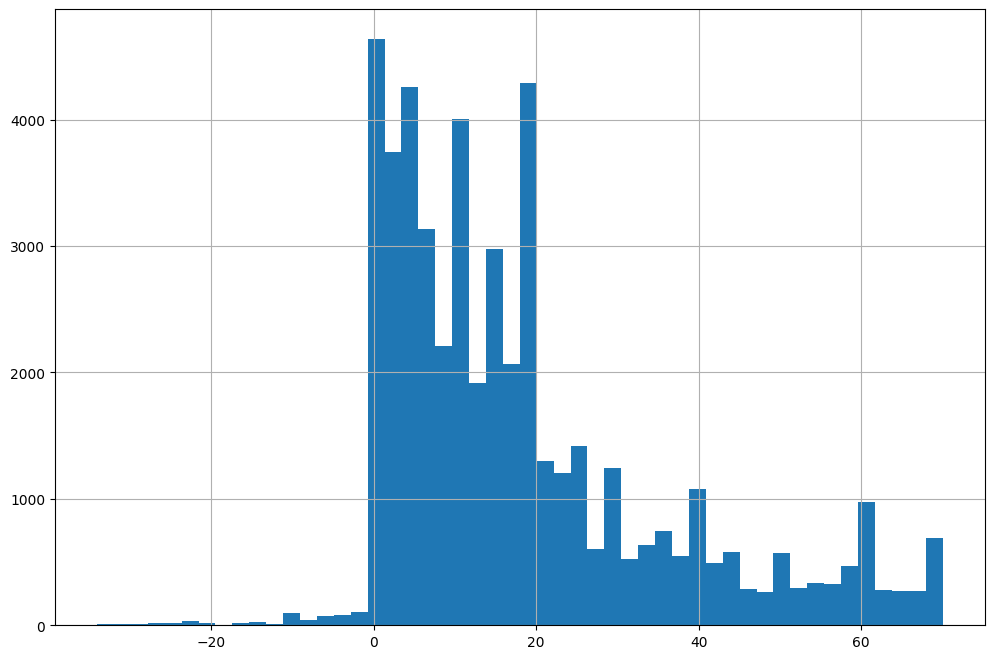

In [76]:
ol_p_no_outliers_df.Discount.hist(bins= 50, figsize=(12,8));

In [77]:
ol_p_no_outliers_df.Discount.describe()

count   49232.00
mean       18.32
std        17.60
min       -34.00
25%         5.00
50%        14.00
75%        25.00
max        70.00
Name: Discount, dtype: float64

In [78]:
#ol_p_no_outliers_df.nlargest(10,'Discount_%')
#nlargest_skus = ol_p_no_outliers_df.nlargest(10, 'Discount_%')['sku'].tolist()
top_skus = ol_p_no_outliers_df.sort_values('Discount_%', ascending=False).drop_duplicates('sku').head(100)['sku'].tolist()
top_skus

['MOP0109',
 'MOP0108',
 'MOP0107',
 'GRT0462',
 'GRT0464',
 'GRT0466',
 'GRT0459',
 'GRT0465',
 'NTE0039-A',
 'NTE0040-A',
 'AP20124',
 'LIF0038-A',
 'ZAG0037',
 'GRT0463',
 'AP20125',
 'NTE0058',
 'OWC0087',
 'GRT0315',
 'MOX0019',
 'APP0697',
 'KUA0015-A',
 'PUR0107',
 'KUA0016-A',
 'OTT0126-A',
 'NTE0045',
 'ZAG0024-A',
 'NTE0055',
 'NTE0046',
 'LOG0084',
 'OPU0003-A',
 'OTT0132',
 'OPU0010',
 'NTE0025-A',
 'NTE0023',
 'NTE0111-A',
 'LEX0037',
 'KUA0009',
 'KUA0024',
 'ZAG0030',
 'JMO0068',
 'ZAG0019',
 'NTE0054',
 'JMO0066',
 'BOO0066',
 'ZAG0034',
 'GRT0436',
 'MOX0023',
 'NTE0123',
 'NTE0122',
 'ZAG0018-A',
 'OWC0151-A',
 'LEP0014',
 'KUA0020',
 'APP0692-A',
 'LIF0053',
 'APP1045',
 'APP1039-A',
 'LIF0070-A',
 'KUA0019',
 'KUA0022',
 'KUA0028',
 'KUA0021',
 'KUA0026',
 'KUA0017',
 'KUA0018',
 'KUA0027',
 'NTE0078',
 'OWC0001-A',
 'ZAG0032',
 'MOP0113',
 'NTE0118',
 'SAT0004-A',
 'BEL0184',
 'NTE0117',
 'NTE0087-A',
 'NTE0121',
 'MOX0015',
 'MOP0111',
 'SAT0005-A',
 'MOP0110',
 '

In [79]:
sum(ol_p_no_outliers_df.Discount > 0), sum(ol_p_no_outliers_df.Discount <= 0)

(45389, 3843)

In [80]:
ol_p_no_outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49232 entries, 0 to 53230
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                49232 non-null  int64         
 1   id_order          49232 non-null  int64         
 2   product_id        49232 non-null  int64         
 3   product_quantity  49232 non-null  int64         
 4   sku               49232 non-null  object        
 5   unit_price        49232 non-null  float64       
 6   date              49232 non-null  datetime64[ns]
 7   name              49232 non-null  object        
 8   desc              49229 non-null  object        
 9   price             49232 non-null  float64       
 10  promo_price       49232 non-null  object        
 11  in_stock          49232 non-null  int64         
 12  type              49225 non-null  object        
 13  short_brand       49232 non-null  object        
 14  Discount          4923

In [81]:
# Add a column Discount
ol_p_no_outliers_df["Discount"] = (ol_p_no_outliers_df["price"] - ol_p_no_outliers_df["unit_price"]).round()
ol_p_no_outliers_df.head(5)

<ipython-input-81-1696583803bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ol_p_no_outliers_df["Discount"] = (ol_p_no_outliers_df["price"] - ol_p_no_outliers_df["unit_price"]).round()


,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type,short_brand,Discount,Discount_%
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,14.00,23.00
1,1120182,299404,0,1,OWC0100,47.49,2017-01-01 22:50:39,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,14.00,23.00
2,1121550,300650,0,1,OWC0100,49.99,2017-01-02 15:31:09,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,11.00,18.00
3,1121801,300760,0,1,OWC0100,49.99,2017-01-02 17:20:31,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,11.00,18.00
4,1124334,301975,0,1,OWC0100,49.99,2017-01-03 20:04:54,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,11.00,18.00


In [82]:
avg_discount=ol_p_no_outliers_df["Discount"].mean().round(2)
avg_discount


18.32

In [83]:
# Add a column Discount_%
ol_p_no_outliers_df["Discount_%"] = (ol_p_no_outliers_df["Discount"] * 100 /ol_p_no_outliers_df["price"]).round()
ol_p_no_outliers_df.head(5)

<ipython-input-83-b9af21a9f21d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ol_p_no_outliers_df["Discount_%"] = (ol_p_no_outliers_df["Discount"] * 100 /ol_p_no_outliers_df["price"]).round()


,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type,short_brand,Discount,Discount_%
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,14.00,23.00
1,1120182,299404,0,1,OWC0100,47.49,2017-01-01 22:50:39,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,14.00,23.00
2,1121550,300650,0,1,OWC0100,49.99,2017-01-02 15:31:09,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,11.00,18.00
3,1121801,300760,0,1,OWC0100,49.99,2017-01-02 17:20:31,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,11.00,18.00
4,1124334,301975,0,1,OWC0100,49.99,2017-01-03 20:04:54,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,11.00,18.00


In [84]:
avg_discount_per=ol_p_no_outliers_df["Discount_%"].mean()
avg_discount_per.round(2)

20.94

In [85]:
ol_p_no_outliers_df.head(2)

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type,short_brand,Discount,Discount_%
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,14.00,23.00
1,1120182,299404,0,1,OWC0100,47.49,2017-01-01 22:50:39,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,14.00,23.00


In [86]:
# Assuming you have a DataFrame called 'df' with columns 'Price' and 'Discount' containing the respective values

# Calculate the discounted price for each product
#ol_p_no_outliers_df['Discounted_Price'] = df['Price'] * (1 - df['Discount'] / 100)

# Calculate the revenue for each product
ol_p_no_outliers_df['Revenue'] = ol_p_no_outliers_df['unit_price'] * ol_p_no_outliers_df['product_quantity']
total_revenue = ol_p_no_outliers_df['Revenue'].sum()
total_revenue

<ipython-input-86-4117c24cfec2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ol_p_no_outliers_df['Revenue'] = ol_p_no_outliers_df['unit_price'] * ol_p_no_outliers_df['product_quantity']


6062258.159999999

In [87]:
# Assuming you have a DataFrame called 'ol_p_no_outliers_df' with columns 'Discounted_Price' and 'product_quantity' containing the respective values

#revenue for each product
ol_p_no_outliers_df['Revenue'] = ol_p_no_outliers_df['unit_price'] * ol_p_no_outliers_df['product_quantity']

#otal revenue
total_revenue = ol_p_no_outliers_df['Revenue'].sum()

#revenue percentage of the total revenue
revenue_percentage = (total_revenue / total_revenue) * 100
revenue_percentage


<ipython-input-87-82eb6dc8fd76>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ol_p_no_outliers_df['Revenue'] = ol_p_no_outliers_df['unit_price'] * ol_p_no_outliers_df['product_quantity']


100.0

In [88]:
revenue_percentage

100.0

In [89]:
# Assuming you have a DataFrame called 'ol_p_no_outliers_df' with columns 'Discounted_Price' and 'product_quantity' containing the respective values

# Sort the DataFrame based on product quantity in descending order
sorted_df = ol_p_no_outliers_df.sort_values('product_quantity', ascending=False)

# Select the top 10 rows with the highest product quantity
top_10_products = sorted_df.head(10)

# Calculate the revenue for each of the selected products
top_10_products['Revenue'] = top_10_products['unit_price'] * top_10_products['product_quantity']

# Sum up the revenue for the 10 products
total_revenue = top_10_products['Revenue'].sum()
total_revenue

<ipython-input-89-4f3138446e78>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_products['Revenue'] = top_10_products['unit_price'] * top_10_products['product_quantity']


18563.649999999998

In [90]:
sku_list = top_10_products['sku'].tolist()
sku_list

['SAN0186',
 'STA0016',
 'SAN0110',
 'CRU0050',
 'OTT0132',
 'SEA0049',
 'SAM0070',
 'APP0698',
 'GRT0422',
 'MAT0007']

In [91]:
# Assuming you have the total revenue stored in a variable called 'total_revenue'
total_revenue = 18563.65

# Calculate the revenue percentage for each product
top_10_products['Revenue_Percentage'] = (top_10_products['Revenue'] / total_revenue) * 100
top_10_products.head(5)

<ipython-input-91-f862df253851>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_products['Revenue_Percentage'] = (top_10_products['Revenue'] / total_revenue) * 100


,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type,short_brand,Discount,Discount_%,Revenue,Revenue_Percentage
49809,1436657,438871,0,72,SAN0186,8.65,2017-11-24 12:44:49,SanDisk Ultra 16GB microSDHC Memory Card A1,Micro Memory Card with Adapter reading speed 9...,9.99,100.007,1,57445397,SAN,1.00,10.00,622.80,3.35
13830,1573834,495987,0,50,STA0016,9.99,2018-01-22 12:16:31,Startech Mini DisplayPort to DisplayPort Cable...,Adapdator Cable Mini Display Port Male to Disp...,12.99,99.898,0,1325,STA,3.00,23.00,499.50,2.69
30633,1604948,507768,0,37,SAN0110,9.00,2018-02-07 19:08:22,SanDisk Ultra Flair Flash Drive 16GB USB 3.0,USB 3.0 flash drive 16GB USB Flash Drive Mac a...,8.99,9,1,11935397,SAN,-0.00,-0.00,333.00,1.79
13338,1422565,432242,0,35,CRU0050,77.90,2017-11-22 20:28:58,Crucial MX300 275GB SSD Disk,SSD 275GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,98.39,909.944,0,12215397,CRU,20.00,20.00,2726.50,14.69
8147,1121091,300475,0,35,OTT0132,29.99,2017-01-02 12:14:04,OtterBox Symmetry Alpha Glass Case + Screen Pr...,Pack OtterBox Symmetry Case + Screen Protector...,49.99,119.899,0,11865403,OTT,20.00,40.00,1049.65,5.65


In [92]:
ol_p_no_outliers_df.head(2)

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type,short_brand,Discount,Discount_%,Revenue
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,14.00,23.00,47.49
1,1120182,299404,0,1,OWC0100,47.49,2017-01-01 22:50:39,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,14.00,23.00,47.49


# How do seasonality and special dates (Christmas, Black Friday) affect sales?

<ipython-input-93-4fa51b5a46ca>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .sum()["unit_price_total"]


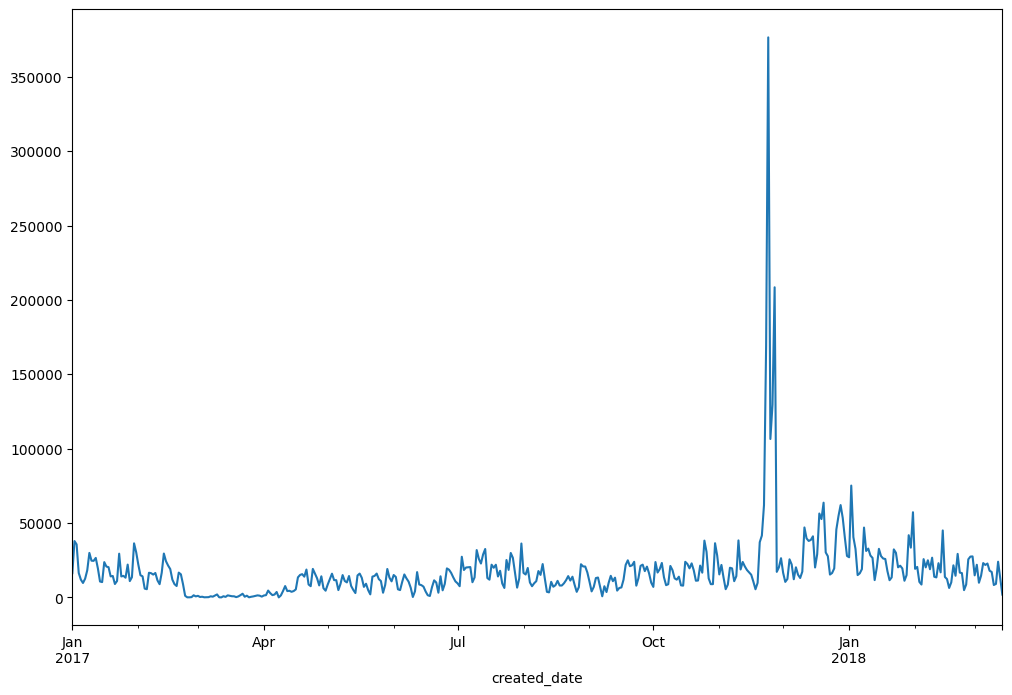

In [93]:
# total_paid per day
(
    diff_no_outliers_df.resample("D", on="created_date")
    .sum()["unit_price_total"]
    .plot(figsize=(12, 8))
);

<ipython-input-94-188b03d8a445>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .sum()["Discount"]


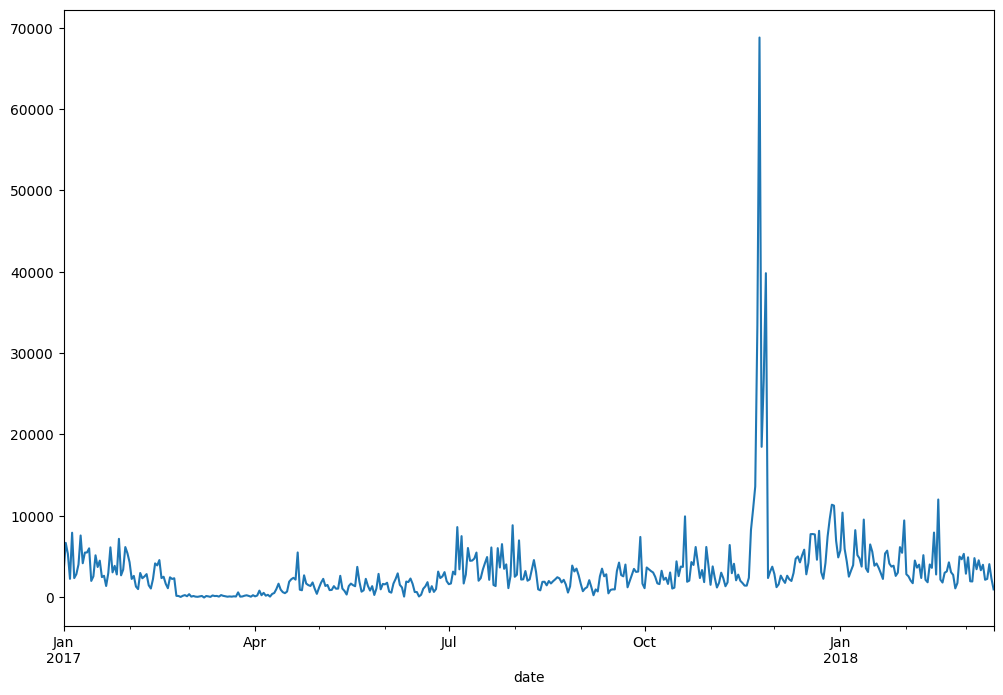

In [94]:
 # Disocunt per day
(
    ol_p.resample("D", on="date")
    .sum()["Discount"]
    .plot(figsize=(12, 8))
);

In [95]:
# Delete time frame around peek to have a closer look at rest of the year
start_date = pd.to_datetime('2017-11-10')
end_date = pd.to_datetime('2017-12-02')

# for orders_qu
filtered_data_o = orders_qu[(orders_qu["created_date"] < start_date) | (orders_qu["created_date"] > end_date)]
 # for diff_no_outliers_df
filtered_data_d = diff_no_outliers_df[(diff_no_outliers_df["created_date"] < start_date) | (diff_no_outliers_df["created_date"] > end_date)]
 # for ol_p
filtered_data_ol = ol_p[(ol_p["date"] < start_date) | (ol_p["date"] > end_date)]

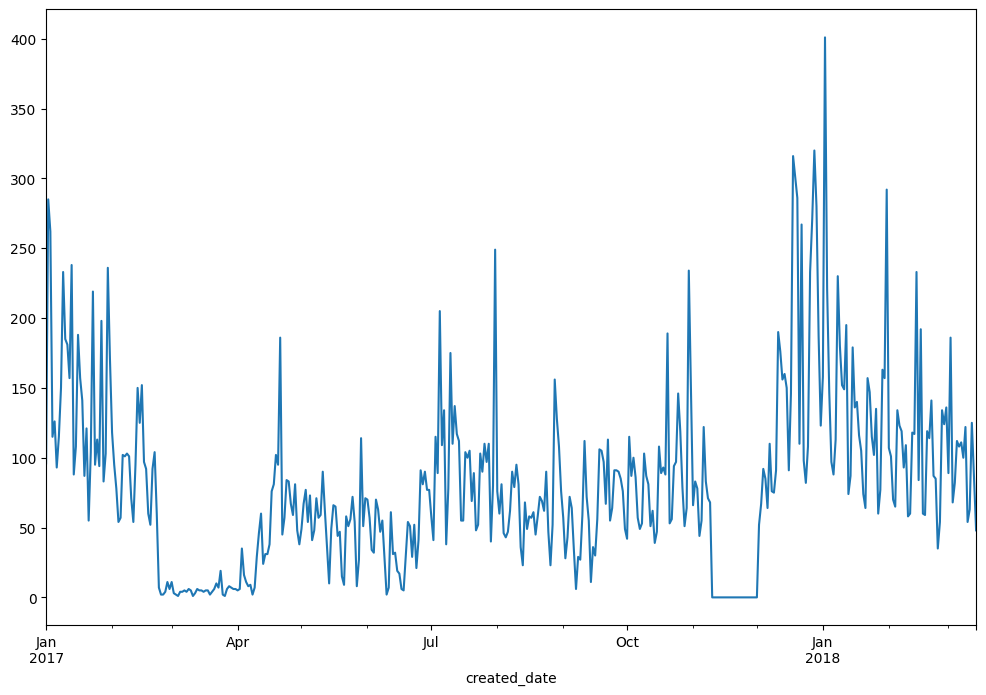

In [96]:
(
    filtered_data_o.resample("D", on="created_date")
    .count()["order_id"]
    .plot(figsize=(12, 8))
);

<ipython-input-97-b87025c5f5ec>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .sum()["unit_price_total"]


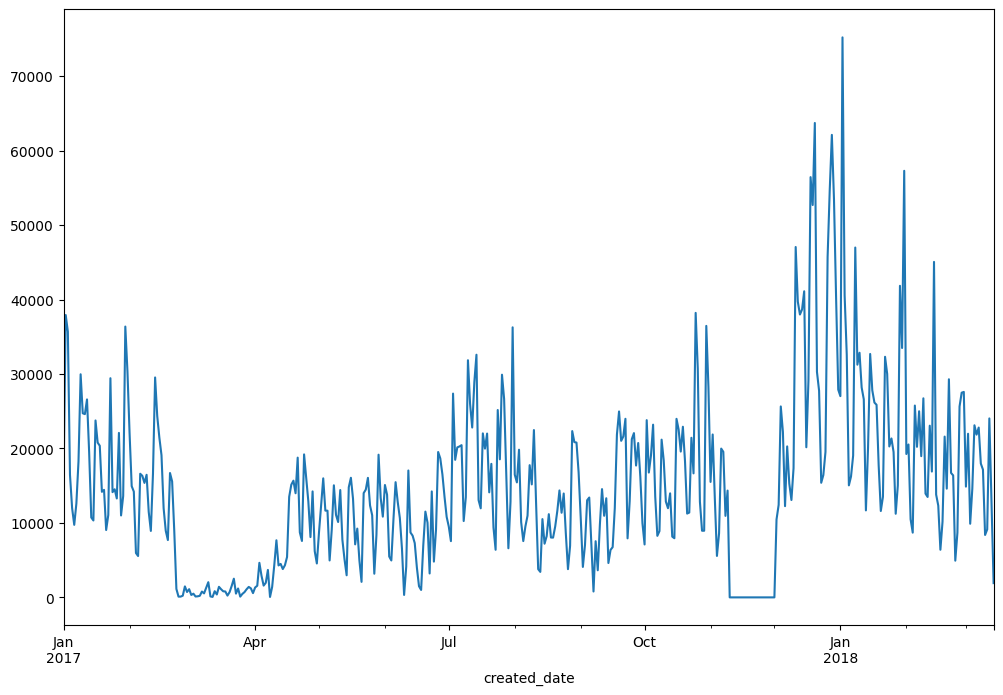

In [97]:
(
    filtered_data_d.resample("D", on="created_date")
    .sum()["unit_price_total"]
    .plot(figsize=(12, 8))
);

<ipython-input-98-a7c01cec7c35>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .sum()["Discount"]


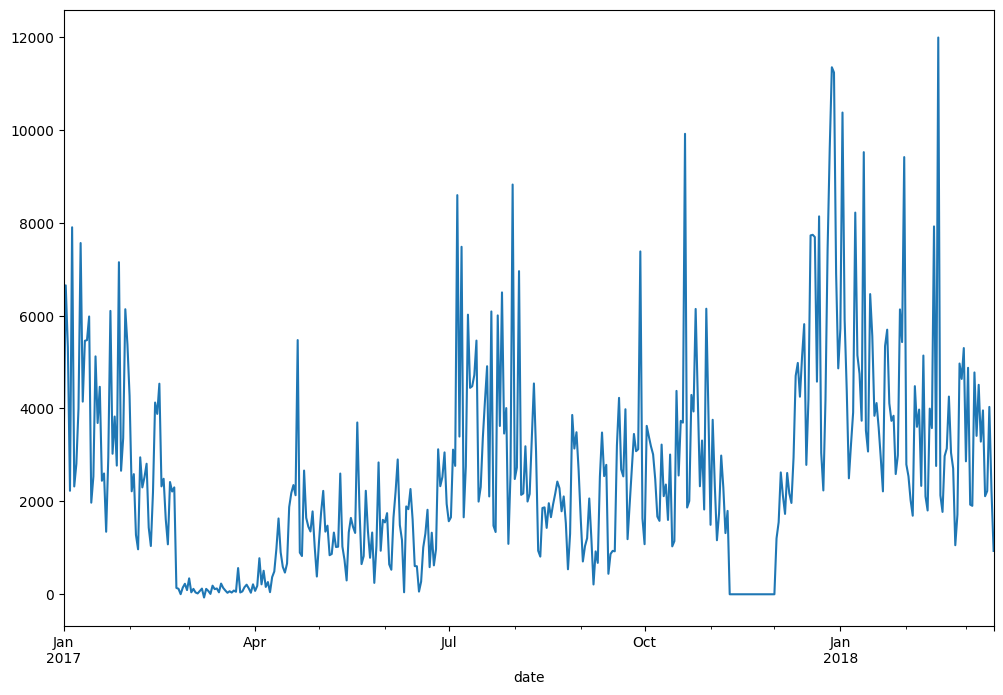

In [98]:
(
    filtered_data_ol.resample("D", on="date")
    .sum()["Discount"]
    .plot(figsize=(12, 8))
);

# Other Graphs

<Axes: >

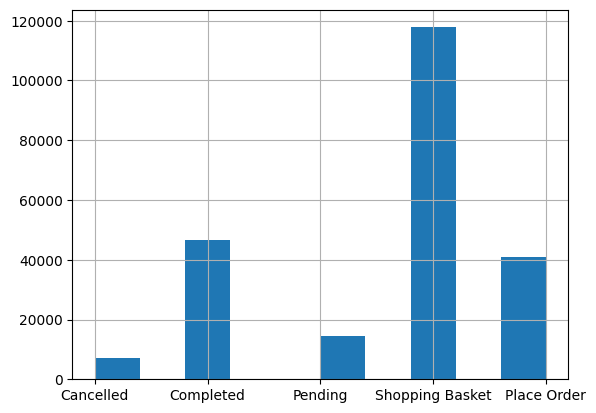

In [99]:
orders.state.hist()

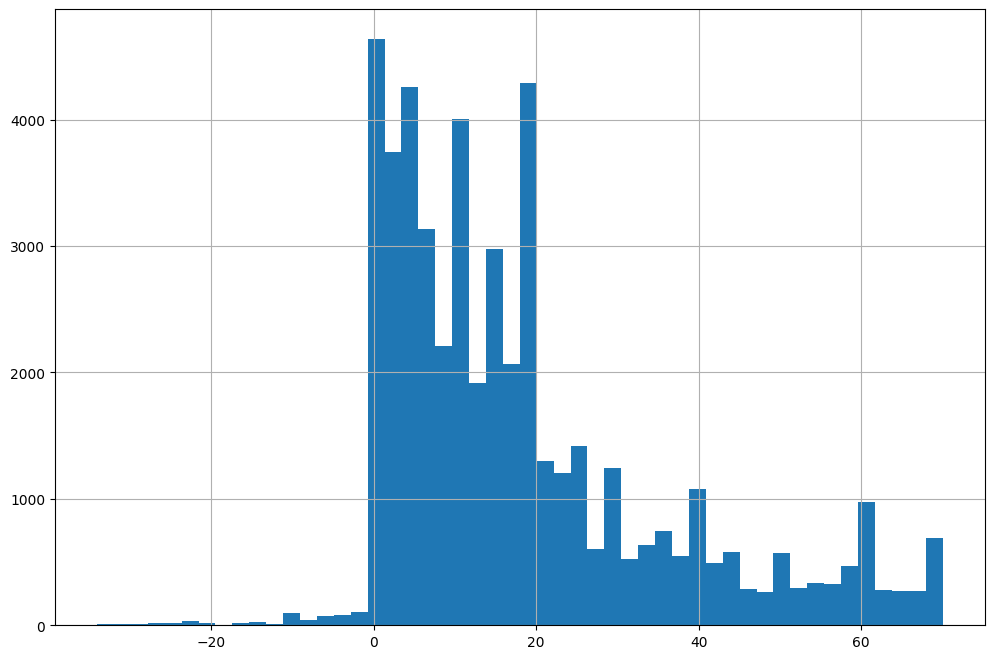

In [100]:
ol_p_no_outliers_df.Discount.hist(bins= 50, figsize=(12,8));

In [101]:
product_category_df = products_cl.copy()

In [102]:
product_category_df["category"] = ""
product_category_df.loc[product_category_df["name"].str.contains("^.{0,7}apple iphone", case=False), "category"] += ", smartphone"
product_category_df.loc[product_category_df["name"].str.contains("^.{0,7}apple ipod", case=False), "category"] += ", ipod"
product_category_df.loc[product_category_df["name"].str.contains("^.{0,7}apple ipad|tablet", case=False), "category"] += ", tablet"
product_category_df.loc[product_category_df["name"].str.contains("imac|mac mini|mac pro", case=False), "category"] += ",desktop"
product_category_df.loc[product_category_df["name"].str.contains("apple", case=False), "category"] += ",apple acessories"

In [103]:
product_category_df.sample(50)

,sku,name,desc,price,promo_price,in_stock,type,short_brand,category
17021,PAC1697,Pack QNAP TS-251A NAS Server | 16GB RAM | Seag...,NAS with 16GB of RAM and 12TB (2x6TB) Seagate ...,1051.65,8.671.792,0,12175397,PAC,
18797,WDT0364-A,Open - My Passport for Mac 4TB External Hard D...,External Hard Drive 4TB refitted compatible wi...,179.99,1.188.241,0,11935397,WDT,
11216,QNA0156,QNAP TS-653A | 4GB RAM Mac and PC Server NAS,NAS server 4 bays and 4 GB RAM for small busin...,845.79,8.449.902,0,12175397,QNA,
14602,SAT0038,Satechi Bluetooth Headset Aluminum Gray Space,Bluetooth headset with microphone and port Jac...,79.99,569.898,1,5384,SAT,
1491,PAC0619,Pack Synology DS1515 + | WD 20TB Network,Pack Synology DS1515 + 20TB (5x4TB) WD Network...,1781.99,15.479.627,0,12175397,PAC,
2322,MOP0065,Mophie Juice Pack Plus Battery Case (3300 mAh)...,Case 3300 mAh battery and LED indicator for iP...,129.99,669.856,0,"5,49E+11",MOP,
17204,AP20262,Like new - Apple iPhone 7 256GB Gold Rosa,Apple iPhone 7 Plus 256GB Rose Gold Free recon...,990.33,7.790.004,0,85641716,AP2,",apple acessories"
1031,PAC0434,OWC Mercury Elite Pro + 2TB,External connection box with eSata / FW800 / U...,210.98,1.645.842,1,11935397,PAC,
2430,FCM0006-2,Mac memory FCM 4GB (2x2GB) SO-DIMM DDR3 1066MHz,RAM 4GB (2x2GB) Mac mini iMac MacBook and MacB...,40.00,379.904,0,1364,FCM,
14949,OWC0161-A,(Open) expansion Kit SSD 240GB 6G OWC Aura for...,SSD 240GB expansion for MacBook Air 11-inch an...,217.99,1.815.835,0,1298,OWC,


In [104]:
category_discounts=ol_p_no_outliers_df.merge(
    product_category_df,
    how = 'left',
    on = 'sku'
    ).head(5)
category_discounts

,id,id_order,product_id,product_quantity,sku,unit_price,date,name_x,desc_x,price_x,...,Discount_%,Revenue,name_y,desc_y,price_y,promo_price_y,in_stock_y,type_y,short_brand_y,category
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,...,23.00,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,",desktop"
1,1120182,299404,0,1,OWC0100,47.49,2017-01-01 22:50:39,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,...,23.00,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,",desktop"
2,1121550,300650,0,1,OWC0100,49.99,2017-01-02 15:31:09,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,...,18.00,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,",desktop"
3,1121801,300760,0,1,OWC0100,49.99,2017-01-02 17:20:31,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,...,18.00,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,",desktop"
4,1124334,301975,0,1,OWC0100,49.99,2017-01-03 20:04:54,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,...,18.00,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,",desktop"


In [105]:
filtered_products = category_discounts.loc[category_discounts['category'].str.contains('ipod|tablet|desktop|apple accessories', case=False)]
average_discount = filtered_products['Discount_%'].mean()


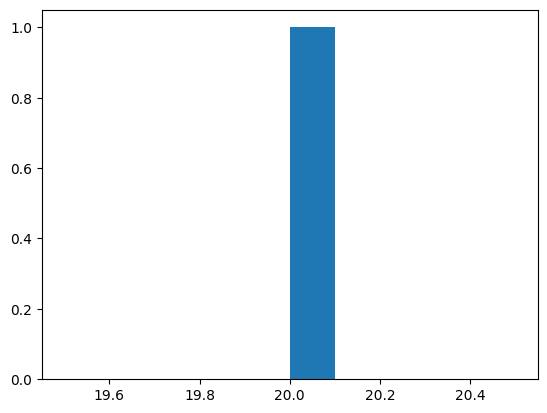

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'average_discount' is a numpy array or a list containing data points
average_discount = np.array([0.5, 0.6, 0.7, 0.8, 0.9, 0.8, 0.7, 0.6])

# Plot the histogram
plt.hist( filtered_products['Discount_%'].mean())

# Optionally, add labels and a title to the plot
x=filtered_products

# Display the plot
plt.show()

In [107]:
ol_p_no_outliers_df.head(1)

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type,short_brand,Discount,Discount_%,Revenue
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1,12755395,OWC,14.00,23.00,47.49


In [108]:
#ol_p_no_outliers_df['Discount_Category'] = ['low' if discount <= 20 else 'medium' if discount <= 40 else 'aggressive'
                                            for discount in ol_p_no_outliers_df['Discount_%']]
ol_p_no_outliers_df.head(1)

IndentationError: ignored

In [ ]:
def categorize_discount(discount):
    if discount <= 20:
        return 'low'
    elif discount <= 40:
        return 'medium'
    else:
        return 'aggressive'
ol_p_no_outliers_df['Discount_Category'] =ol_p_no_outliers_df['Discount_%'].apply(categorize_discount)
discount_counts = ol_p_no_outliers_df['Discount_Category'].value_counts()

In [ ]:
import matplotlib as plt
total_products = len( ol_p_no_outliers_df)
discount_percentages = (discount_counts / total_products) * 100
discount_percentages.plt.bar('categories', 'percentages')



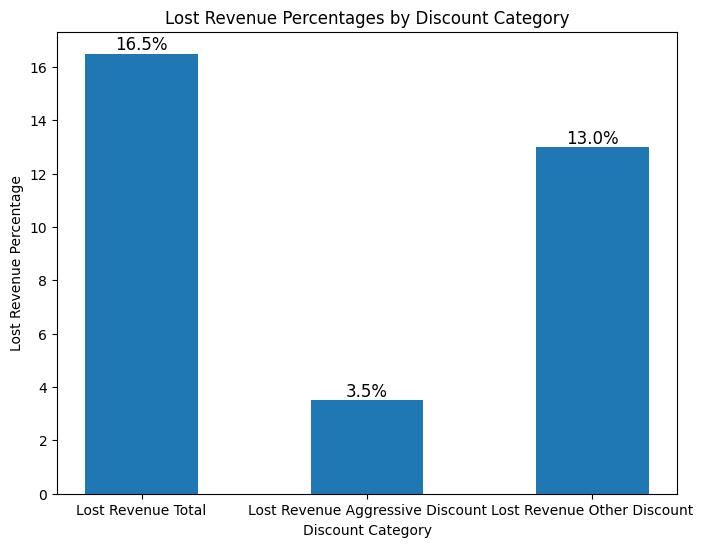

In [137]:
import matplotlib.pyplot as plt

# Given data
lost_revenue_total = 16.5
lost_revenue_aggressive = 3.5
lost_revenue_other = 13

# Data for the bar chart
categories = ['Lost Revenue Total', 'Lost Revenue Aggressive Discount', 'Lost Revenue Other Discount']
percentages = [lost_revenue_total, lost_revenue_aggressive, lost_revenue_other]

# Set the figure size (adjust as needed)
plt.figure(figsize=(8, 6))

# Create a bar chart with thinner bars
plt.bar(categories, percentages, width=0.5)

# Add labels and a title to the plot
plt.xlabel('Discount Category')
plt.ylabel('Lost Revenue Percentage')
plt.title('Lost Revenue Percentages by Discount Category')

# Display percentages on the bars with adjusted font size
for i, percentage in enumerate(percentages):
    plt.text(i, percentage, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()






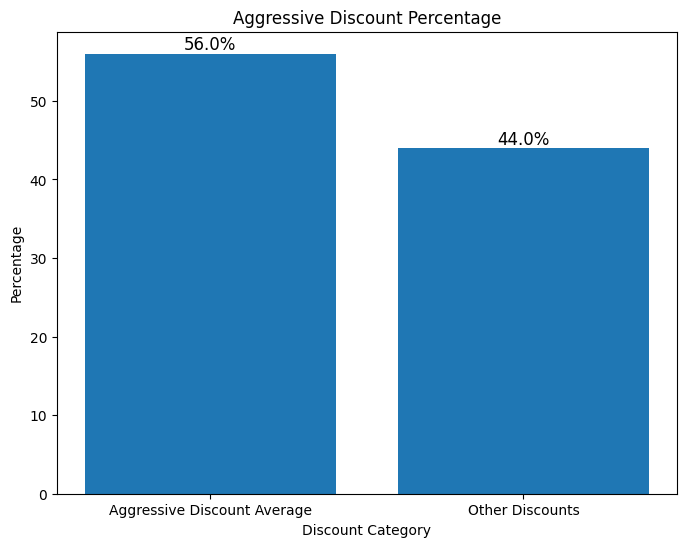

In [143]:
import matplotlib.pyplot as plt

# Given data
aggressive_discount_avg = 56
aggressive_discount_present = 19

# Data for the histogram
categories = ['Aggressive Discount Average', 'Other Discounts']
percentages = [aggressive_discount_avg, 100 - aggressive_discount_avg]

# Set the figure size (adjust as needed)
plt.figure(figsize=(8, 6))

# Create a bar chart (histogram) with percentages displayed on the bars
plt.bar(categories, percentages)

# Display percentages on the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=12)

# Add labels and a title to the plot
plt.xlabel('Discount Category')
plt.ylabel('Percentage')
plt.title('Aggressive Discount Percentage')

# Display the plot
plt.show()



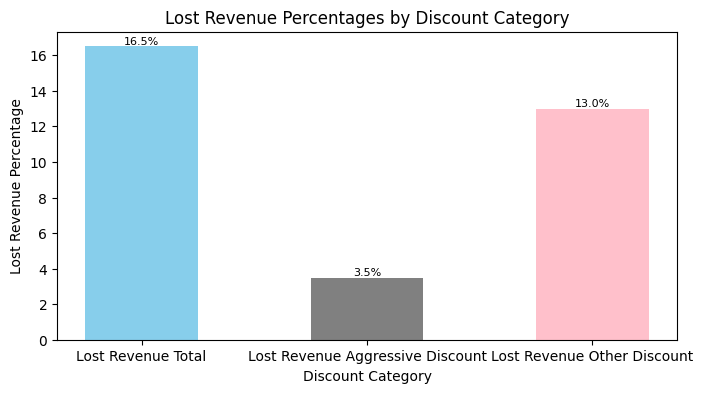

In [150]:
import matplotlib.pyplot as plt

# Given data
lost_revenue_total = 16.5
lost_revenue_aggressive = 3.5
lost_revenue_other = 13

# Data for the bar chart
categories = ['Lost Revenue Total', 'Lost Revenue Aggressive Discount', 'Lost Revenue Other Discount']
percentages = [lost_revenue_total, lost_revenue_aggressive, lost_revenue_other]

# Set the figure size (adjust as needed)
plt.figure(figsize=(8, 4))

# Specify different colors for the bars
colors = ['skyblue', 'grey', 'pink']

# Create a bar chart with specified colors and thinner bars
plt.bar(categories, percentages, width=0.5, color=colors)

# Add labels and a title to the plot
plt.xlabel('Discount Category')
plt.ylabel('Lost Revenue Percentage')
plt.title('Lost Revenue Percentages by Discount Category')

# Display percentages on the bars with adjusted font size
for i, percentage in enumerate(percentages):
    plt.text(i, percentage, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=8)

# Display the plot
plt.show()


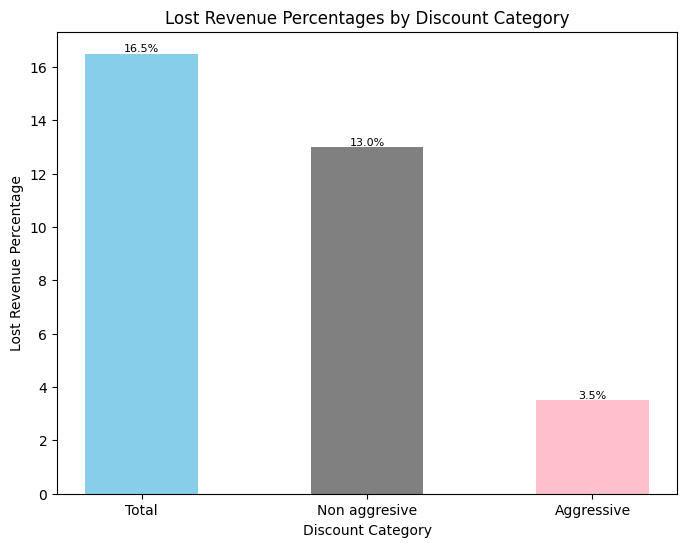

In [156]:
import matplotlib.pyplot as plt

# Given data
lost_revenue_total = 16.5
lost_revenue_aggressive = 3.5
lost_revenue_other = 13

# Data for the bar chart
categories = ['Total', 'Non aggresive', 'Aggressive']
percentages = [lost_revenue_total, lost_revenue_other, lost_revenue_aggressive]

# Sort data in descending order
categories, percentages = zip(*sorted(zip(categories, percentages), key=lambda x: x[1], reverse=True))

# Set the figure size (adjust as needed)
plt.figure(figsize=(8, 6))

# Specify different colors for the bars
colors = ['skyblue', 'grey', 'pink']

# Create a bar chart with specified colors and thinner bars
plt.bar(categories, percentages, width=0.5, color=colors)

# Add labels and a title to the plot
plt.xlabel('Discount Category')
plt.ylabel('Lost Revenue Percentage')
plt.title('Lost Revenue Percentages by Discount Category')

# Display percentages on the bars with adjusted font size
for i, percentage in enumerate(percentages):
    plt.text(i, percentage, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=8)

# Display the plot
plt.show()



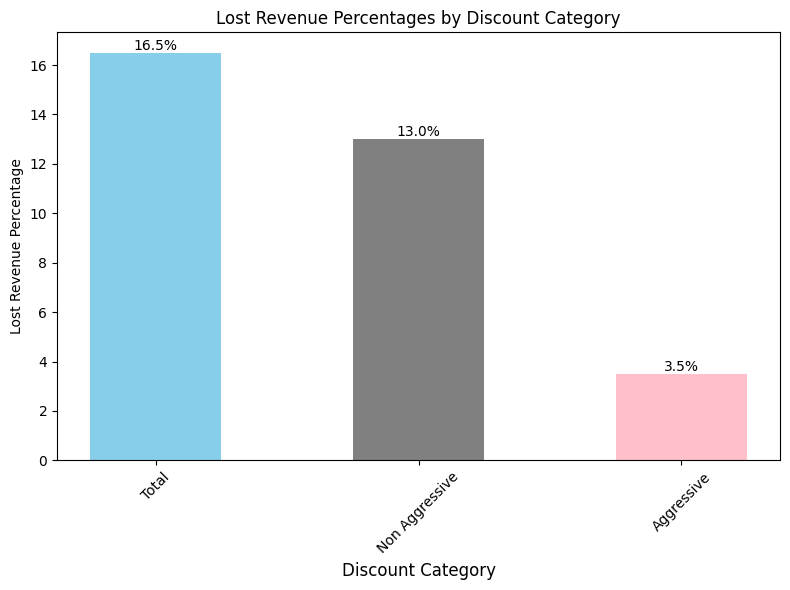

In [157]:
import matplotlib.pyplot as plt

# Given data
lost_revenue_total = 16.5
lost_revenue_aggressive = 3.5
lost_revenue_other = 13

# Data for the bar chart
categories = ['Total', 'Non Aggressive', 'Aggressive']
percentages = [lost_revenue_total, lost_revenue_other, lost_revenue_aggressive]

# Sort data in descending order
categories, percentages = zip(*sorted(zip(categories, percentages), key=lambda x: x[1], reverse=True))

# Set the figure size (adjust as needed)
plt.figure(figsize=(8, 6))

# Specify different colors for the bars
colors = ['skyblue', 'grey', 'pink']

# Create a bar chart with specified colors and thinner bars
plt.bar(categories, percentages, width=0.5, color=colors)

# Add labels and a title to the plot
plt.xlabel('Discount Category', fontsize=12)  # Larger font size for x-axis label
plt.ylabel('Lost Revenue Percentage')
plt.title('Lost Revenue Percentages by Discount Category')

# Display percentages on the bars with adjusted font size
for i, percentage in enumerate(percentages):
    plt.text(i, percentage, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # To ensure the labels are not cut off
plt.show()
